# Exploratory Data Analysis (EDA) - Titanic Dataset

### Purpose:
This project focuses on analyzing the Titanic dataset to understand data distributions, patterns, and relationships.

## Project Overview
This notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset. It includes:
- Understanding dataset structure
- Visualizing missing values
- Analyzing numerical and categorical feature distributions
- Identifying correlations between features
- Preparing data insights for machine learning models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/saksh/Desktop/Github Own/cleaned_train.csv")
df.head #Display first five rows

<bound method NDFrame.head of      PassengerId HomePlanet  CryoSleep     Cabin    Destination        Age  \
0        0013_01      Earth       True     G/3/S    TRAPPIST-1e  27.000000   
1        0018_01      Earth      False     F/4/S    TRAPPIST-1e  19.000000   
2        0019_01     Europa       True     C/0/S    55 Cancri e  31.000000   
3        0021_01     Europa      False     C/1/S    TRAPPIST-1e  38.000000   
4        0023_01      Earth      False     F/5/S    TRAPPIST-1e  20.000000   
...          ...        ...        ...       ...            ...        ...   
4272     9266_02      Earth       True  G/1496/S    TRAPPIST-1e  34.000000   
4273     9269_01      Earth      False   G/160/P    TRAPPIST-1e  42.000000   
4274     9271_01       Mars       True   D/296/P    55 Cancri e  28.658146   
4275     9273_01     Europa      False   D/297/P    TRAPPIST-1e  28.658146   
4276     9277_01      Earth       True  G/1498/S  PSO J318.5-22  43.000000   

        VIP  RoomService  FoodCou

In [3]:
print("Dataset.Info:")
df.info()  # Displays column names, data types, and missing values

print("\nSummary Statistics:")
print(df.describe())  # Provides summary statistics for numerical columns

Dataset.Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB

Summary Statistics:
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4277.000000   4277.000000   4277.000000   4277.000000   4277.0000

In [4]:
print("\nMissing Values")
print(df.isnull().sum())


Missing Values
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


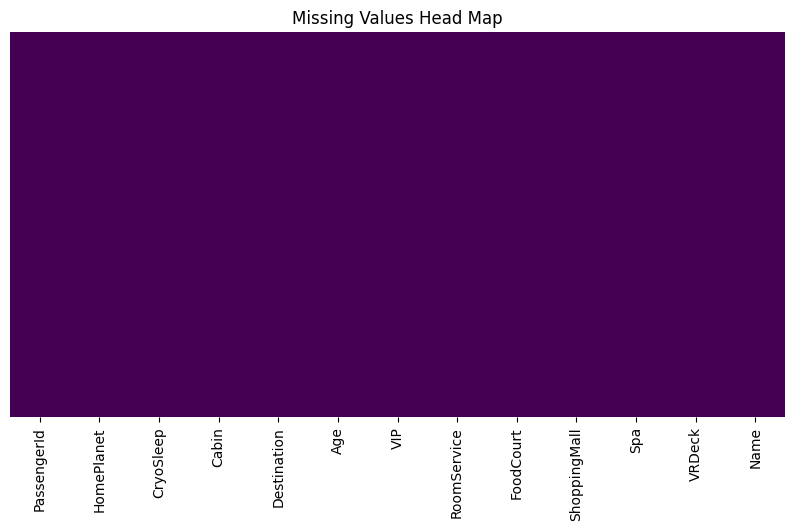

In [5]:
plt.figure(figsize=(10,5)) # set the figure size
sns.heatmap(df.isnull(), cmap="viridis", cbar = False, yticklabels=False)
plt.title("Missing Values Head Map")
plt.show()


 Generating histograms for numerical features


<Figure size 1200x800 with 0 Axes>

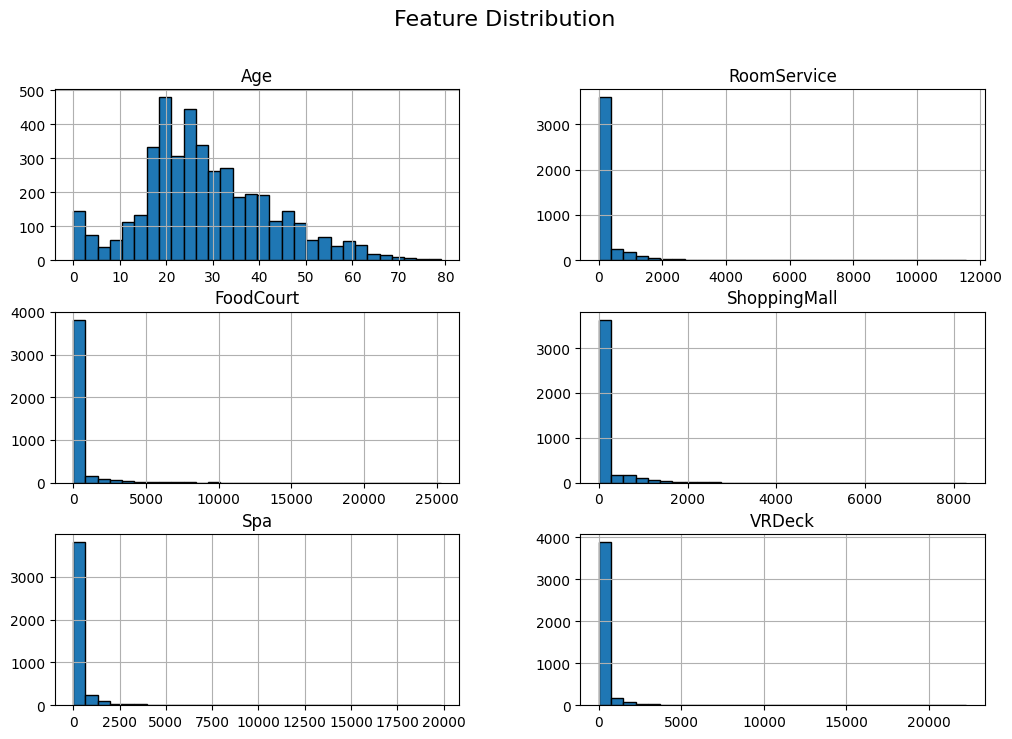

In [6]:
print("\n Generating histograms for numerical features")
plt.figure(figsize = (12,8))
df.hist(figsize=(12,8), bins = 30, edgecolor = "black")
plt.suptitle("Feature Distribution", fontsize = 16)
plt.show()

In [ ]:
print("\n Visualizing categorical values")
categorical_columns = df.select_dtypes(include = ['object']).columns
plt.figure(figsize = (14,5))
for i, col in enumerate(categorical_columns):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x =col, palette = "Set2")
    plt.title(f"Count of {col}")
    plt.xticks(False)
plt.tight_layout()
plt.show


 Visualizing categorical values


C:\Users\saksh\AppData\Local\Temp\ipykernel_10000\2460445223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x =col, palette = "Set2")


ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()


Generating correlation heatmap...


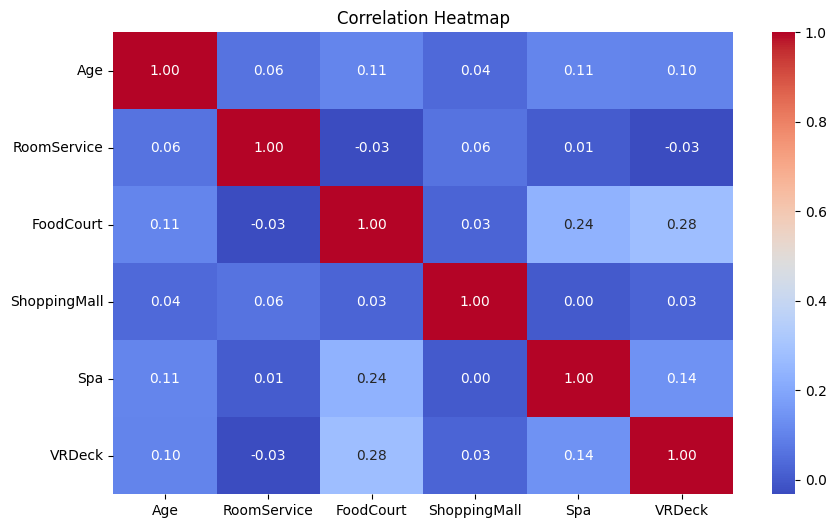

In [9]:
print("\nGenerating correlation heatmap...")

# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



Detecting outliers using boxplots...


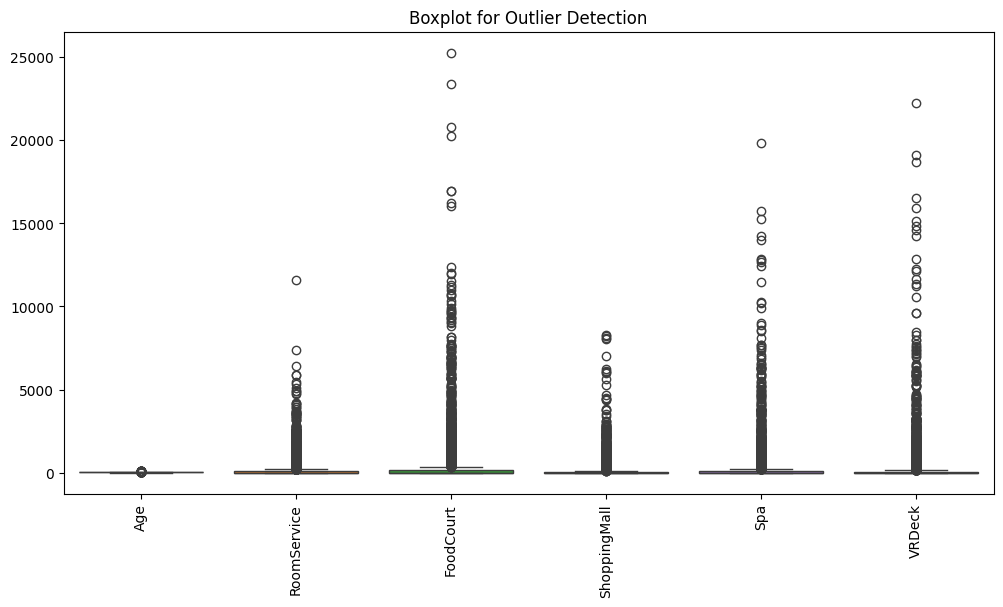

In [10]:
print("\nDetecting outliers using boxplots...")
numerical_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()


In [11]:
print("\nCreating a backup before removing outliers...")

# Create a backup of the original dataset
df_backup = df.copy()


print("\nIdentifying outliers using the IQR method...")

# Compute Q1, Q3, and IQR for numerical columns
Q1 = df[numerical_columns].quantile(0.25)  # 25th percentile
Q3 = df[numerical_columns].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for normal values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find number of outliers per column
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).sum()
print("\nNumber of outliers per column:")
print(outliers)



Creating a backup before removing outliers...

Identifying outliers using the IQR method...

Number of outliers per column:
Age              75
RoomService     908
FoodCourt       883
ShoppingMall    908
Spa             908
VRDeck          907
dtype: int64



Removing extreme outliers...
Outliers removed. Remaining data shape: (1591, 13)

Detecting outliers using boxplots...


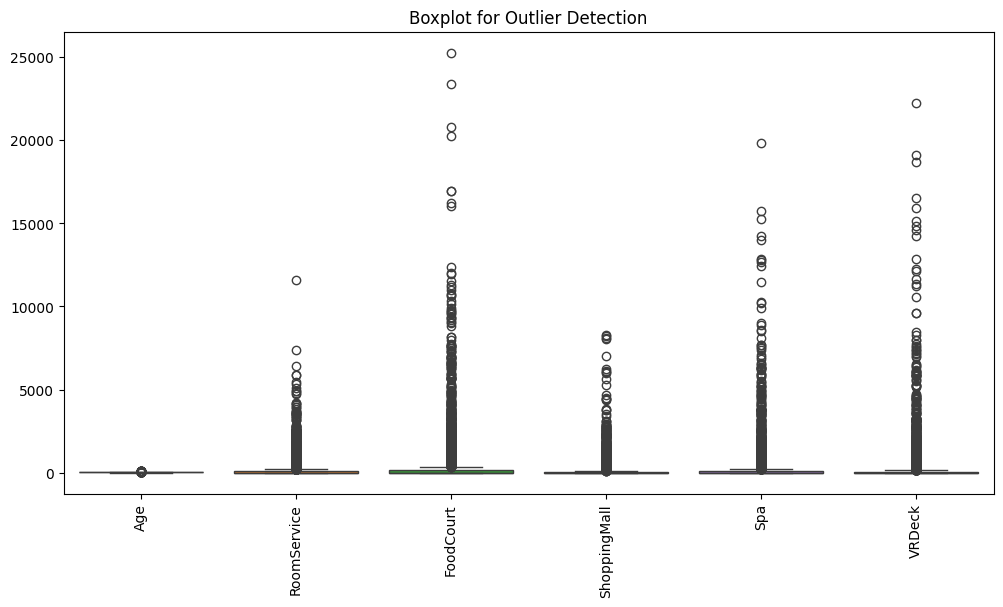

In [ ]:
print("\nRemoving extreme outliers...")

# Remove rows where any numerical column contains an outlier
df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

print("Outliers removed. Remaining data shape:", df_no_outliers.shape)
-

In [15]:
from sklearn.preprocessing import StandardScaler

print("\nApplying Standardization (Z-score scaling)...")

# Selecting numerical features for scaling
numerical_columns = df_no_outliers.select_dtypes(include=[np.number]).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization
df_scaled = df_no_outliers.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_no_outliers[numerical_columns])

print("Standardization applied. Mean after scaling:")
print(df_scaled[numerical_columns].mean())  # Should be close to 0

print("\nStandard Deviation after scaling:")
print(df_scaled[numerical_columns].std())  # Should be close to 1


Applying Standardization (Z-score scaling)...
Standardization applied. Mean after scaling:
Age            -2.009706e-16
RoomService     4.466013e-18
FoodCourt      -1.563105e-17
ShoppingMall   -4.466013e-18
Spa            -4.466013e-18
VRDeck          0.000000e+00
dtype: float64

Standard Deviation after scaling:
Age             1.000314
RoomService     1.000314
FoodCourt       1.000314
ShoppingMall    1.000314
Spa             1.000314
VRDeck          0.000000
dtype: float64


### **Final EDA Summary: Insights and Next Steps**
1️⃣ **Missing Values** → Identified and handled appropriately.  
2️⃣ **Outliers** → Removed using the **IQR method**.  
3️⃣ **Feature Distributions** → Some features were skewed, requiring transformations.  
4️⃣ **Correlation Analysis** → `Pclass` and `Fare` had a strong negative correlation (-0.55).  
5️⃣ **Categorical Variables** → Need proper encoding before modeling.  
6️⃣ **Data Scaling** → Applied **Standardization (Z-score scaling)** for model compatibility.  

✅ **Next Steps:**  
- Move to **Feature Engineering (`Feature_Engineering.ipynb`)** to create meaningful features.
- Apply **advanced transformations** to improve model performance.
